In [2]:
import pandas as pd

In [3]:
df_dph = pd.read_parquet('diphotonjet_bkg.parquet',engine = 'pyarrow')
df_dph
df_dph['class'] = [0]*5177438
df_dph = df_dph.sample(frac = 1)
df_dph = df_dph.head(1453389)

In [4]:
df_signal = pd.read_parquet('GGH_125_2017UL.parquet',engine = 'pyarrow')
df_signal
df_signal['class'] = [1]*1453389
df_signal['subleadptom'] = df_signal['sublead_pt']/df_signal['mass']
df_signal['leadptom'] = df_signal['lead_pt']/df_signal['mass']
df_signal = df_signal[['sublead_mvaID','sigmarv','lead_mvaID','sublead_eta','subleadptom','vtxprob','lead_eta','sigmawv','leadptom','CosPhi','PV_chi2','PV_Score','class']]

In [5]:
df = pd.concat([df_dph,df_signal],axis=0,join = 'outer')
df = df.sample(frac = 1)
df

,sublead_mvaID,sigmarv,lead_mvaID,sublead_eta,subleadptom,vtxprob,lead_eta,sigmawv,leadptom,CosPhi,PV_chi2,PV_Score,class
5671,0.312903,0.014515,0.974118,0.811768,0.353681,0.999,1.109131,0.023177,0.816200,-0.691954,0.695312,332.0,1
206551,0.930430,0.013295,0.987032,-1.825684,0.256465,0.999,-0.054871,0.020299,0.489434,-0.960391,0.654297,479.0,1
57926,0.972035,0.016936,0.702604,2.134766,0.497659,0.999,2.325195,0.022513,0.630720,-0.573150,0.755859,566.0,0
210826,0.723672,0.014574,0.989793,1.288818,0.564018,0.999,0.679810,0.024208,0.762462,0.028903,0.613281,786.0,1
770484,0.833344,0.017933,0.939889,-1.063721,0.438534,0.999,-2.221191,0.025554,0.444273,-0.822177,0.832031,294.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220633,0.907561,0.020718,0.645535,-1.851807,0.471198,0.999,-1.311035,0.025851,0.577815,-0.683585,0.613281,201.0,1
699178,0.820316,0.017825,-0.569814,-1.821533,0.414242,0.999,-1.625977,0.022278,0.620151,-0.925919,0.835938,347.0,1
3334387,0.923378,0.013485,0.656230,0.481018,0.536215,0.999,1.239746,0.026906,1.428640,0.648377,0.560547,6448.0,0
1293472,0.872027,0.010665,0.884297,-1.004150,0.398369,0.999,-1.098877,0.020603,0.631154,-0.984393,0.708984,686.0,1


In [6]:
#from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
import matplotlib.pyplot as plt
import scienceplots
import scienceplots
plt.style.use(['science', 'notebook'])
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [9]:
target = df['class']
features = df[['sublead_mvaID','sigmarv','lead_mvaID','sublead_eta','subleadptom','vtxprob','lead_eta','sigmawv','leadptom','CosPhi','PV_chi2','PV_Score']]
features

,sublead_mvaID,sigmarv,lead_mvaID,sublead_eta,subleadptom,vtxprob,lead_eta,sigmawv,leadptom,CosPhi,PV_chi2,PV_Score
5671,0.312903,0.014515,0.974118,0.811768,0.353681,0.999,1.109131,0.023177,0.816200,-0.691954,0.695312,332.0
206551,0.930430,0.013295,0.987032,-1.825684,0.256465,0.999,-0.054871,0.020299,0.489434,-0.960391,0.654297,479.0
57926,0.972035,0.016936,0.702604,2.134766,0.497659,0.999,2.325195,0.022513,0.630720,-0.573150,0.755859,566.0
210826,0.723672,0.014574,0.989793,1.288818,0.564018,0.999,0.679810,0.024208,0.762462,0.028903,0.613281,786.0
770484,0.833344,0.017933,0.939889,-1.063721,0.438534,0.999,-2.221191,0.025554,0.444273,-0.822177,0.832031,294.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1220633,0.907561,0.020718,0.645535,-1.851807,0.471198,0.999,-1.311035,0.025851,0.577815,-0.683585,0.613281,201.0
699178,0.820316,0.017825,-0.569814,-1.821533,0.414242,0.999,-1.625977,0.022278,0.620151,-0.925919,0.835938,347.0
3334387,0.923378,0.013485,0.656230,0.481018,0.536215,0.999,1.239746,0.026906,1.428640,0.648377,0.560547,6448.0
1293472,0.872027,0.010665,0.884297,-1.004150,0.398369,0.999,-1.098877,0.020603,0.631154,-0.984393,0.708984,686.0


In [10]:
cols = features.columns
df_scaled = StandardScaler().fit(features)
dfsc = df_scaled.transform(features)
scaled_features = pd.DataFrame(dfsc,
                         columns=cols)
scaled_features.describe()

,sublead_mvaID,sigmarv,lead_mvaID,sublead_eta,subleadptom,vtxprob,lead_eta,sigmawv,leadptom,CosPhi,PV_chi2,PV_Score
count,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06,2.906778e+06
mean,-5.723146e-17,-1.202342e-15,-1.511161e-16,-1.697075e-17,-1.988914e-15,-3.996803e-15,-2.234969e-17,5.244729e-16,4.530335e-16,-1.364015e-15,3.276814e-17,-4.090203e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.962414e+00,-7.080609e-01,-4.370143e+00,-2.077359e+00,-1.295241e+00,-3.996803e-15,-2.103979e+00,-1.212417e+00,-1.075696e+00,-6.797737e-01,-3.721564e+00,-2.796258e-01
25%,-1.380092e-01,-4.421491e-01,-5.994285e-02,-7.298574e-01,-5.931450e-01,-3.996803e-15,-7.309032e-01,-4.482844e-01,-4.963145e-01,-6.498778e-01,-3.700096e-01,-2.624636e-01
50%,4.410556e-01,-1.113826e-01,4.327922e-01,8.963164e-04,-9.085830e-02,-3.996803e-15,2.150768e-03,3.460166e-02,-2.500555e-01,-4.800513e-01,-3.386538e-02,-2.331384e-01
75%,6.174719e-01,2.196848e-01,5.764568e-01,7.275842e-01,4.001093e-01,-3.996803e-15,7.273859e-01,3.102388e-01,1.958238e-01,1.957150e-01,3.121655e-01,-8.096453e-02
max,7.126936e-01,2.535555e+01,6.518653e-01,2.079857e+00,1.736467e+02,-3.996803e-15,2.106760e+00,2.443065e+01,7.652023e+01,3.305895e+00,5.784012e+02,1.007187e+02


In [11]:
target.describe()

count    2906778.0
mean           0.5
std            0.5
min            0.0
25%            0.0
50%            0.5
75%            1.0
max            1.0
Name: class, dtype: float64

In [13]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='all',n_jobs = -2)  
f_resampled, t_resampled = tl.fit_resample(scaled_features, target)
print(f_resampled.shape)

(2286928, 12)


In [14]:
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(f_resampled, t_resampled,test_size = 0.2, random_state = 0,shuffle = True)
X_train.describe()

,sublead_mvaID,sigmarv,lead_mvaID,sublead_eta,subleadptom,vtxprob,lead_eta,sigmawv,leadptom,CosPhi,PV_chi2,PV_Score
count,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06,1.829542e+06
mean,-3.807972e-03,4.547626e-03,-3.980291e-03,-7.473599e-04,9.064657e-03,-3.996803e-15,2.152671e-04,4.468067e-03,9.473098e-03,1.070734e-02,1.978895e-03,2.666633e-02
std,1.002956e+00,1.025274e+00,1.003686e+00,1.000298e+00,1.026225e+00,0.000000e+00,1.000237e+00,1.022786e+00,1.020652e+00,1.008038e+00,8.498145e-01,1.085037e+00
min,-3.962414e+00,-7.065498e-01,-4.370068e+00,-2.077359e+00,-1.295241e+00,-3.996803e-15,-2.103979e+00,-1.210084e+00,-1.075696e+00,-6.797737e-01,-3.721564e+00,-2.796258e-01
25%,-1.435070e-01,-4.420092e-01,-6.525935e-02,-7.302634e-01,-5.937524e-01,-3.996803e-15,-7.299778e-01,-4.474735e-01,-4.934091e-01,-6.484133e-01,-3.700096e-01,-2.621554e-01
50%,4.374516e-01,-1.112439e-01,4.288551e-01,-2.487437e-04,-8.731796e-02,-3.996803e-15,2.510844e-03,3.490624e-02,-2.468376e-01,-4.716674e-01,-3.386538e-02,-2.299681e-01
75%,6.168163e-01,2.220666e-01,5.760623e-01,7.265690e-01,4.055695e-01,-3.996803e-15,7.268975e-01,3.116869e-01,2.036754e-01,2.132322e-01,3.220521e-01,-6.194280e-02
max,7.126936e-01,2.394896e+01,6.517504e-01,2.079857e+00,1.118677e+02,-3.996803e-15,2.106760e+00,2.297701e+01,5.423882e+01,3.305895e+00,4.024989e+02,1.007187e+02


In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.0625, random_state = 42)
X_train.describe()

,sublead_mvaID,sigmarv,lead_mvaID,sublead_eta,subleadptom,vtxprob,lead_eta,sigmawv,leadptom,CosPhi,PV_chi2,PV_Score
count,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06,1.715195e+06
mean,-3.723455e-03,4.403175e-03,-4.066923e-03,-9.174985e-04,8.880763e-03,-3.996803e-15,2.564841e-04,4.344488e-03,9.217067e-03,1.047225e-02,1.955567e-03,2.657815e-02
std,1.002894e+00,1.023680e+00,1.003810e+00,1.000401e+00,1.026303e+00,0.000000e+00,1.000449e+00,1.021348e+00,1.020678e+00,1.007816e+00,8.458963e-01,1.086356e+00
min,-3.962414e+00,-7.065498e-01,-4.370068e+00,-2.077359e+00,-1.295241e+00,-3.996803e-15,-2.103979e+00,-1.210084e+00,-1.075696e+00,-6.797737e-01,-3.721564e+00,-2.796258e-01
25%,-1.433703e-01,-4.419925e-01,-6.526792e-02,-7.303650e-01,-5.938250e-01,-3.996803e-15,-7.299778e-01,-4.473659e-01,-4.934204e-01,-6.484039e-01,-3.700096e-01,-2.621113e-01
50%,4.374529e-01,-1.111904e-01,4.288299e-01,-7.138856e-04,-8.722550e-02,-3.996803e-15,2.606837e-03,3.513312e-02,-2.469492e-01,-4.717572e-01,-3.386538e-02,-2.297920e-01
75%,6.168507e-01,2.223489e-01,5.760513e-01,7.263660e-01,4.055460e-01,-3.996803e-15,7.270003e-01,3.118622e-01,2.034661e-01,2.131046e-01,3.220521e-01,-6.123829e-02
max,7.126936e-01,2.394896e+01,6.517504e-01,2.079857e+00,1.118677e+02,-3.996803e-15,2.106760e+00,2.297701e+01,5.423882e+01,3.305895e+00,4.024989e+02,1.007187e+02


In [18]:
y_train

1935269    1
1130654    0
635142     1
14712      0
2049835    1
          ..
347599     1
441547     0
572650     1
1555234    0
505017     0
Name: class, Length: 1715195, dtype: int64

In [19]:
training_inputs, training_outputs = torch.tensor(X_train.values, dtype = torch.float).to(device),torch.tensor(y_train.values, dtype = torch.float).reshape(-1, 1).to(device)
validation_inputs, validation_outputs = torch.tensor(X_valid.values, dtype = torch.float).to(device),torch.tensor(y_valid.values, dtype = torch.float).reshape(-1, 1).to(device)
#training_outputs.reshape(-1, 1).shape

In [20]:
train_dataset = CustomDataset(training_inputs, training_outputs)
train_dataloader = DataLoader(train_dataset, batch_size=524, shuffle=True)

In [21]:
validation_dataset = CustomDataset(validation_inputs, validation_outputs)
validation_dataloader = DataLoader(validation_dataset, batch_size=80, shuffle=True)

In [22]:
class classifier(nn.Module):
    def __init__(self,layer,input_dim):
        super().__init__()
        self.layer = layer
        self.input_dim = input_dim
        
        self.hiddenlayer1 = nn.Linear(in_features = self.input_dim, out_features = self.layer[0])
        self.activ1 = nn.ReLU()
        self.hiddenlayer2 = nn.Linear(in_features = self.layer[0],out_features = self.layer[1])
        self.activ2 = nn.ReLU()
        self.hiddenlayer3 = nn.Linear(in_features = self.layer[1],out_features = self.layer[2])
        self.activ3 = nn.ReLU()
        self.hiddenlayer4 = nn.Linear(in_features = self.layer[2],out_features = self.layer[3])
        self.activ4 = nn.ReLU()
        self.hiddenlayer5 = nn.Linear(in_features = self.layer[3],out_features = self.layer[4])
        self.activ5 = nn.Sigmoid()
    def forward(self, inputs):
        out1 = self.hiddenlayer1(inputs)
        out2 = self.activ1(out1)
        out3 = self.hiddenlayer2(out2)
        out4 = self.activ2(out3)
        out5 = self.hiddenlayer3(out4)
        out6 = self.activ3(out5)
        out7 = self.hiddenlayer4(out6)
        out8 = self.activ4(out7)
        out9 = self.hiddenlayer5(out8)
        output = self.activ5(out9)
        return output 

In [23]:
hidden_layers = [20,10,5,2,1]
model = classifier(hidden_layers, 12)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = torch.nn.BCELoss()
n_epochs = 500
valid_loss = []
train_loss = []
for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")
        t_loss = []
        for step, data in enumerate(train_dataloader):
            optimizer.zero_grad()
            prediction = model.forward(data[0])
            #print(prediction)
            #print("data: ",data[1])
            loss = criterion(prediction, data[1])
            loss.backward()
            optimizer.step()
            t_loss.append(loss)
        train_loss.append(torch.tensor(t_loss).mean())
        
        v_loss = []
        for v_step, data in enumerate(validation_dataloader):
            with torch.no_grad():
                _prediction = model.forward(data[0])
                _loss = criterion(_prediction, data[1])
                v_loss.append(_loss)
        valid_loss.append(torch.tensor(v_loss).mean())

        #torch.save(model.state_dict(), f'epoch_{epoch}valloss{valid_loss[epoch]:.3f}.pt')
        print(f"Loss = {train_loss[epoch]:.5f},\t val_loss = {valid_loss[epoch]:.5f}")

Epoch 1/500
Loss = 0.64312,	 val_loss = 0.63313
Epoch 2/500
Loss = 0.62949,	 val_loss = 0.62617
Epoch 3/500
Loss = 0.62470,	 val_loss = 0.62269
Epoch 4/500
Loss = 0.62205,	 val_loss = 0.62056
Epoch 5/500
Loss = 0.62056,	 val_loss = 0.62010
Epoch 6/500
Loss = 0.61964,	 val_loss = 0.61949
Epoch 7/500
Loss = 0.61884,	 val_loss = 0.61870
Epoch 8/500
Loss = 0.61811,	 val_loss = 0.61810
Epoch 9/500
Loss = 0.61760,	 val_loss = 0.61709
Epoch 10/500
Loss = 0.61714,	 val_loss = 0.61805
Epoch 11/500
Loss = 0.61679,	 val_loss = 0.61628
Epoch 12/500
Loss = 0.61659,	 val_loss = 0.61594
Epoch 13/500
Loss = 0.61643,	 val_loss = 0.61551
Epoch 14/500
Loss = 0.61615,	 val_loss = 0.61603
Epoch 15/500
Loss = 0.61596,	 val_loss = 0.61541
Epoch 16/500
Loss = 0.61588,	 val_loss = 0.61626
Epoch 17/500
Loss = 0.61570,	 val_loss = 0.61502
Epoch 18/500
Loss = 0.61559,	 val_loss = 0.61508
Epoch 19/500
Loss = 0.61549,	 val_loss = 0.61472
Epoch 20/500
Loss = 0.61533,	 val_loss = 0.61530
Epoch 21/500
Loss = 0.61524,	

KeyboardInterrupt: 

In [24]:
test_input, test_output = torch.tensor(X_test.values, dtype = torch.float).to(device),torch.tensor(y_test.values, dtype = torch.float).reshape(-1,1).to(device)

In [25]:
pred_output = model.forward(test_input)
pred_output.shape

torch.Size([457386, 1])

In [26]:
pred_output = pred_output.detach().cpu().numpy()
test_output = test_output.detach().cpu().numpy()
pred_output

array([[0.698031  ],
       [0.12062994],
       [0.5217145 ],
       ...,
       [0.38202104],
       [0.6471634 ],
       [0.48222473]], dtype=float32)

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_output, pred_output)

In [28]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.7096864860050591

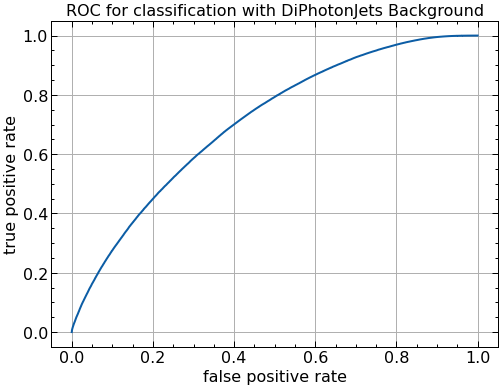

<Figure size 576x432 with 0 Axes>

In [29]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid(True)
plt.title("ROC for classification with DiPhotonJets Background")
plt.show()
plt.savefig("dipho_roc.png")

In [30]:
thresholds[(fpr>0.5999) & (fpr<0.6001)]

array([0.42075172, 0.42075112, 0.4207503 , 0.42074826, 0.420747  ,
       0.42074582, 0.4207452 , 0.42074305, 0.4207413 , 0.42074114,
       0.42074066, 0.42073986, 0.4207377 , 0.42073476, 0.42073467,
       0.4207277 , 0.4207245 , 0.4207233 , 0.42070934, 0.42070606,
       0.42070025, 0.42069703, 0.4206953 , 0.42069337, 0.4206933 ,
       0.42069265, 0.42069215, 0.42068994, 0.42068496, 0.42068294,
       0.42068273, 0.4206815 , 0.42067906, 0.42067897, 0.42067847,
       0.42067665, 0.42067653, 0.4206733 , 0.42067194, 0.42067122],
      dtype=float32)

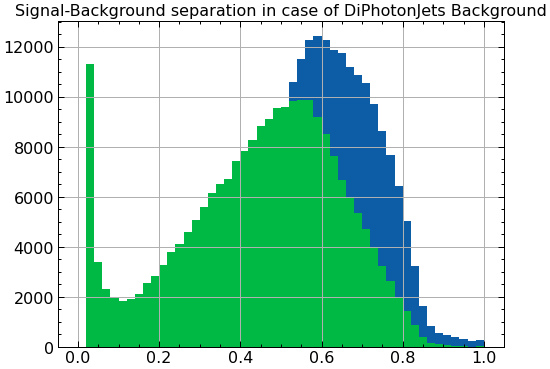

<Figure size 576x432 with 0 Axes>

In [31]:
sig = pred_output[test_output ==1]
bkg = pred_output[test_output==0]
plt.hist(sig,bins = 50,range=(0,1))
plt.hist(bkg,bins = 50,range=(0,1))
plt.title("Signal-Background separation in case of DiPhotonJets Background")
plt.grid(True)
plt.show()
plt.savefig("dipho_sep.png")

In [34]:
from sklearn.metrics import accuracy_score
mask = pred_output > 0.42
pred_output[mask] = 1
pred_output[~mask] = 0
accuracy_score(test_output,pred_output)

0.6329839566580525